In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 12,8

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data['Month'] = pd.to_datetime(data.Month, infer_datetime_format=True)

In [4]:
data_i = data.set_index(['Month'])

In [5]:
data_i.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
from datetime import datetime as dte

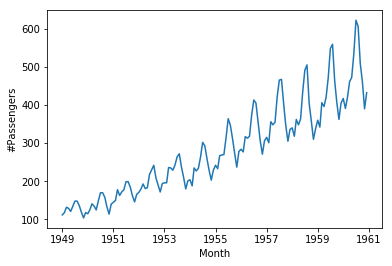

In [7]:
plt.ylabel('#Passengers')
plt.xlabel('Month')
plt.plot(data_i)

In [8]:
#Rolling Statistics
rolmean = data_i.rolling(window=20).mean()
rol_std = data_i.rolling(window=20).std()

print(rolmean, rol_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01          NaN
1950-01-01          NaN
1950-02-01          NaN
1950-03-01          NaN
1950-04-01          NaN
1950-05-01          NaN
1950-06-01          NaN
1950-07-01          NaN
1950-08-01       132.55
1950-09-01       134.85
1950-10-01       135.60
1950-11-01       134.70
1950-12-01       135.25
1951-01-01       136.45
1951-02-01       137.20
1951-03-01       138.70
1951-04-01       139.45
1951-05-01       141.25
1951-06-01       144.20
...                 ...
1958-07-01       369.20
1958-08-01       379.15
1958-09-01       383.60
1958-10-01       386.50
1958-11-01       384.20
1958-12-01       383.65
1959-01-01       383.90
1959-02-01       379.90
1959-03-01      

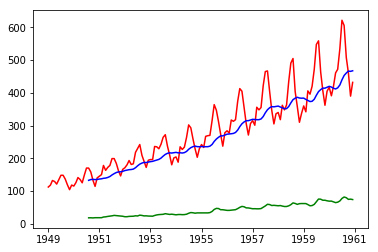

In [9]:
Original = plt.plot(data_i, c='red', label='original')
Mean = plt.plot(rolmean, c='blue',label='mean')
Std = plt.plot(rol_std, c='green', label='std')
plt.show(block=False)

In [18]:
#Performing Dickey-fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data_i['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index=['Test-Statistic', 'p-value', '#Lags Used', '#of Observations used'])
for key,value in dftest[4].items():
    dfoutput["Critical value (%s)"%key] = value

print(dfoutput)

Test-Statistic             0.815369
p-value                    0.991880
#Lags Used                13.000000
#of Observations used    130.000000
Critical value (1%)       -3.481682
Critical value (5%)       -2.884042
Critical value (10%)      -2.578770
dtype: float64


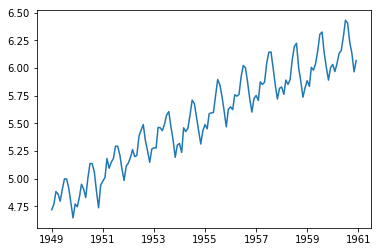

In [19]:
#Estimation of trend
log_data = np.log(data_i)
plt.plot(log_data)

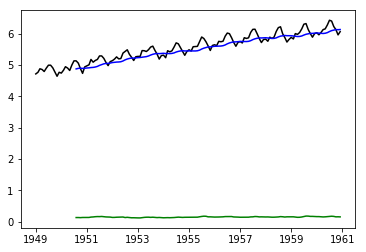

In [25]:
mean_log = log_data.rolling(window=20).mean()
std_log = log_data.rolling(window=20).std()
plt.plot(log_data,c='black')
plt.plot(mean_log,c='blue')
plt.plot(std_log,c='green')

In [29]:
diff_log_data = log_data-mean_log
diff_log_data.head().dropna(inplace=True)

C:\Users\Vishnu\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
diff_log_data.dropna(inplace=True)

In [33]:
diff_log_data

,#Passengers
Month,
1950-08-01,0.257136
1950-09-01,0.166728
1950-10-01,-0.011501
1950-11-01,-0.158322
1950-12-01,0.043031
1951-01-01,0.069075
1951-02-01,0.097708
1951-03-01,0.259628
1951-04-01,0.166768


In [37]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(X):
    
    #Estimation of moving avg and std
    mov_avg = X.rolling(window=12).mean()
    mov_std = X.rolling(window=12).std()
    
    #Plotting rolling values
    Original = plt.plot(X, c='red', label='original')
    Mean = plt.plot(mov_avg, c='blue',label='mean')
    Std = plt.plot(mov_std, c='green', label='std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    dftest = adfuller(X['#Passengers'], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4],index=['Test-Statistic', 'p-value', '#Lags Used', '#of Observations used'])
    for key,value in dftest[4].items():
        dfoutput["Critical value (%s)"%key] = value

    print(dfoutput)

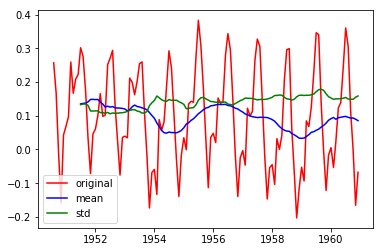

Test-Statistic            -2.758548
p-value                    0.064443
#Lags Used                13.000000
#of Observations used    111.000000
Critical value (1%)       -3.490683
Critical value (5%)       -2.887952
Critical value (10%)      -2.580857
dtype: float64


In [38]:
test_stationary(diff_log_data)

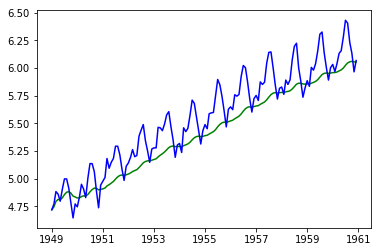

In [39]:
Exp_wei_avg = log_data.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(Exp_wei_avg, c='green')
plt.plot(log_data, c='blue')

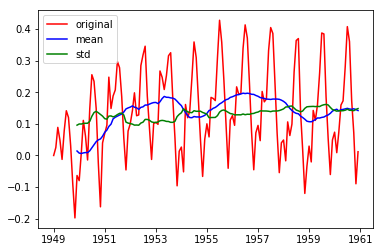

Test-Statistic            -3.601262
p-value                    0.005737
#Lags Used                13.000000
#of Observations used    130.000000
Critical value (1%)       -3.481682
Critical value (5%)       -2.884042
Critical value (10%)      -2.578770
dtype: float64


In [40]:
diff_log_exp = log_data-Exp_wei_avg
test_stationary(diff_log_exp)

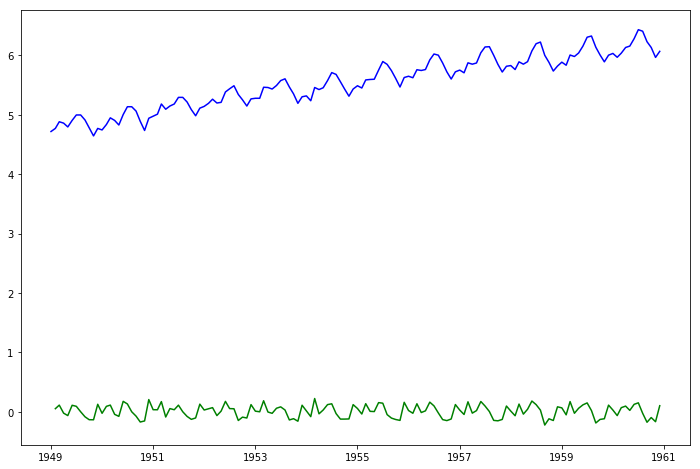

In [49]:
log_shift_data = log_data - log_data.shift()
plt.plot(log_shift_data,c='green')
plt.plot(log_data,c='blue')

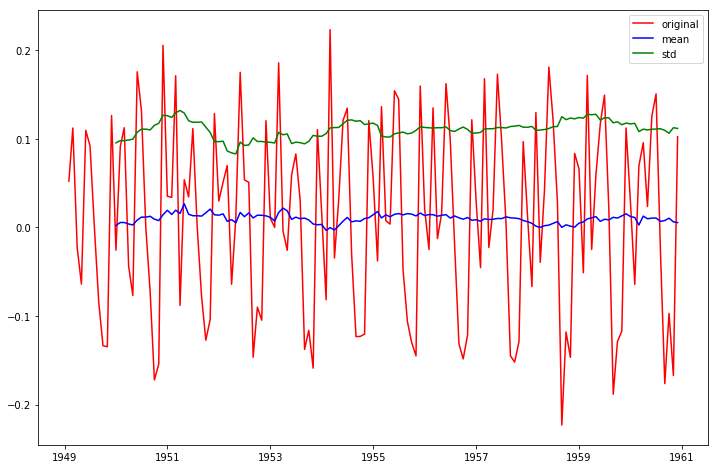

Test-Statistic            -2.717131
p-value                    0.071121
#Lags Used                14.000000
#of Observations used    128.000000
Critical value (1%)       -3.482501
Critical value (5%)       -2.884398
Critical value (10%)      -2.578960
dtype: float64


In [46]:
log_shift_data.dropna(inplace=True)
test_stationary(log_shift_data)

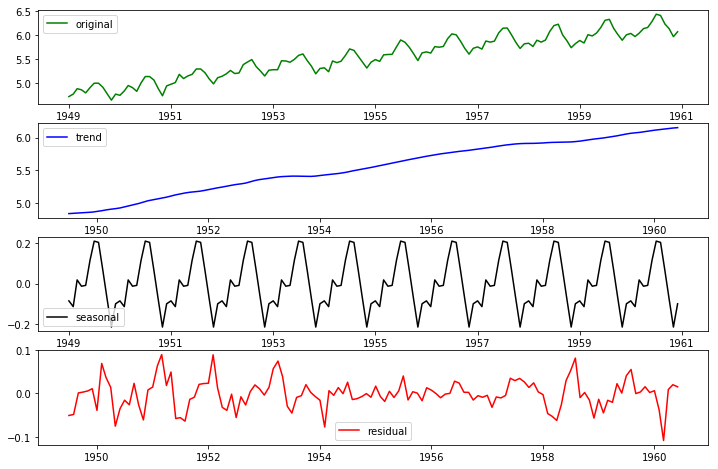

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(log_data)

trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

plt.subplot(411)
plt.plot(log_data,c='green',label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,c='blue',label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,c='black',label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,c='red',label='residual')
plt.legend(loc='best')

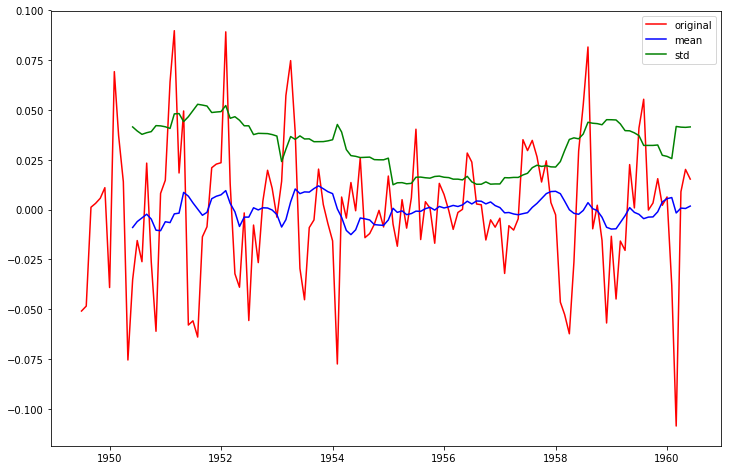

Test-Statistic          -6.332387e+00
p-value                  2.885059e-08
#Lags Used               9.000000e+00
#of Observations used    1.220000e+02
Critical value (1%)     -3.485122e+00
Critical value (5%)     -2.885538e+00
Critical value (10%)    -2.579569e+00
dtype: float64


In [65]:
Res =residual
Res.dropna(inplace=True)
test_stationary(Res)

C:\Users\Vishnu\Anaconda3\envs\py35\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Vishnu\Anaconda3\envs\py35\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Vishnu\Anaconda3\envs\py35\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RS: 1.0292')

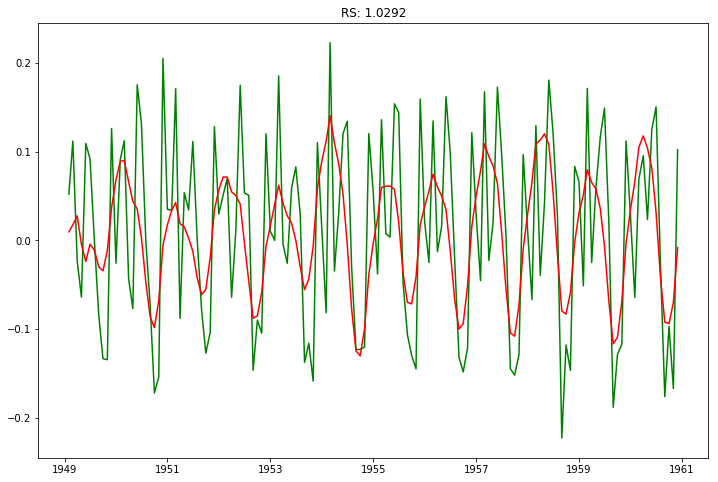

In [90]:
#p,d,q values derived from ACF and PACF graphs
p =2
d =1
q =2

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
#AR MODEL
model = ARIMA(log_data, order=(p,d,q))
results_AR = model.fit(disp=1)
plt.plot(log_shift_data,c='green')
plt.plot(results_AR.fittedvalues,c='red')
plt.title('RS: %.4f' % pd.Series.sum((results_AR.fittedvalues - log_shift_data['#Passengers'])**2))